In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
def L(x, y, p = 2):
    temp =0
    if len(x) == len(y) and len(x) > 0:
        for i in range(len(x)):
            temp += math.pow(abs(x[i] - y[i]),p)
        return math.pow(temp,1 / p)
    else:
        raise Exception ("输入异常！")

In [3]:
L([5],[3])

2.0

In [187]:
class KNN:
    
    def __init__(self, train_x, train_y, k, p):
        
        self.train_x = train_x
        self.train_y = train_y
        self.k = k
        self.p = p
    
    def fit(self, test_x):
        knn_list = []
        for i in range(self.k):
            dist = L(test_x, self.train_x[i], self.p)
            knn_list.append((dist, self.train_y[i]))
        
        for j in range(self.k, len(train_x)):
            max_index = knn_list.index(max(knn_list, key = lambda x: x[0]))
            dist = L(test_x, self.train_x[j], self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.train_y[j])        
        labels = [k[-1] for k in knn_list]
        return Counter(labels).most_common(1)[0][0]
     
    def scores(self, test_x, test_y):
        right_count = 0
        for i in range(len(test_x)):
            label = self.fit(test_x[i])
            if label == test_y[i]:
                right_count += 1
        return right_count / len(test_x)

In [188]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [189]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


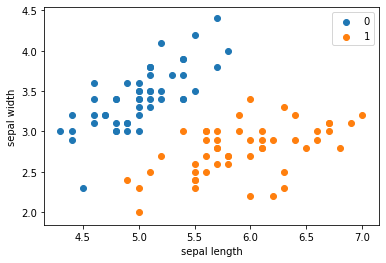

In [190]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [191]:
data = df.iloc[:100, [0, 1, -1]].values
X, y = data[:,:-1], data[:,-1]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [192]:
model = KNN(train_x, train_y,k = 5, p = 2)

In [193]:
model.scores(test_x, test_y)

1.0

In [196]:
test_point = [5.5, 4.2]
print('Test Point: {}'.format(model.fit(test_point)))

Test Point: 0.0


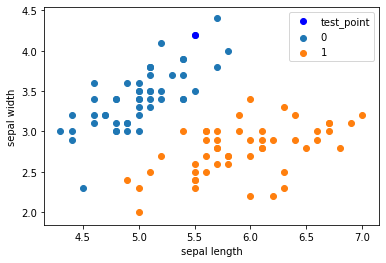

In [197]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### KD树还未完成！

In [13]:
## 构造节点
class KdNode(object):
    
    def __init__(self, data, left = None, right = None, split = None):
        
        self.data = data
        self.left = left
        self.right = right
        self.split = split
        
    def getdata(self):
        return self.data
    def getleft(self):
        return self.left
    def getright(self):
        return self.right
    def getsplit(self):
        return self.split

In [166]:
## 构建kd树
class KdTree(object):
    
    def __init__(self):
        self.data = data
        
    def CreatNode(self, train_x, train_y, split_index = 0):
        
        if len(train_x) == 0:
            return None
        if len(train_x) == 1:
            return KdNode((train_x[0],train_y[0]), None, None, split_index)
        
        argsort = np.argsort(train_x[:,split_index])
        split_index_next = (split_index + 1 ) % len(train_x[0])
        
        left = self.CreatNode(train_x[argsort[0:len(argsort)//2],:],train_y[argsort[0:len(argsort)//2]], split_index_next)
        right = self.CreatNode(train_x[argsort[len(argsort)//2+1:],:],train_y[argsort[len(argsort)//2+1:]], split_index_next)
                            
        return KdNode((train_x[argsort[len(argsort)//2]],train_y[len(argsort)//2]), left, right, split_index)
                      
    
                      
    def SearchTree(self, x, root, k):
    
        k_list = []
        for i in range(k):
            k_list.append([-1,None])
        self.k_list = np.array(k_list)
        
        def search_(node):
            if node is not None:
                split = node.getsplit()
                if x[split] < node.getdata()[0][split]:
                    search_(node.getleft())
                else:
                    search_(node.getright())
                
                dist = L(x, node.getdata()[0], 2)
                for i, data in enumerate(self.k_list):
                    if data[0] < 0 or dist < data[0]:
                        self.k_list = np.insert(self.k_list, i , [dist, node.getdata()], axis = 0)
                        self.k_list = self.k_list[:-1]
                        break
                n = list(self.k_list[:, 0]).count(-1)
                if self.k_list[-n-1, 0] > abs(x[split] - node.getdata()[0][split]):
                    if x[split] < node.getdata()[0][split]:
                        search_(node.getright())
                    else:
                        search_(node.getleft())
           
        
        search_(root)
        knn = self.k_list[:, 1]
        belong = []
        for i in knn:
            belong.append(i[1])
        b = max(set(belong), key = belong.count)
        #或者
        #b = Counter(belong).most_common(1)[0][0]
        return self.k_list, b            
        

In [167]:
kdTree = KdTree()

In [168]:
root = kdTree.CreatNode(train_x,train_y,0)

In [195]:
kdTree.SearchTree([5.5, 4.2],root,5)

(array([[0.0, (array([5.5, 4.2]), 0.0)],
        [0.2828427124746193, (array([5.7, 4.4]), 0.0)],
        [0.31622776601683794, (array([5.2, 4.1]), 0.0)],
        [0.31622776601683805, (array([5.4, 3.9]), 0.0)],
        [0.5099019513592784, (array([5.4, 3.7]), 0.0)]], dtype=object), 0.0)